In [12]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy
import numpy as np

In [6]:
loaded = torch.load("../artificial-graph-generation/generated/100k_frontend_graphs-temporal.npz.torch")

In [7]:
loaded.shape

torch.Size([100000, 17, 17, 16])

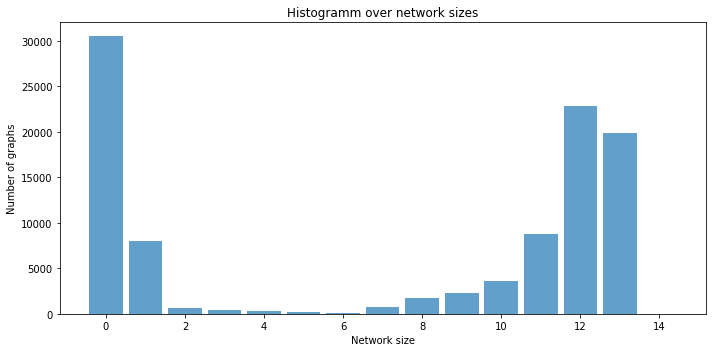

In [14]:
sizes = torch.zeros((100000))
for i in range(loaded.size(0)):
    sizes[i] = loaded[i,:,:,15].sum()
(sizes.numpy()).max()
plt.figure(figsize=(10,5))
plt.hist(sizes.numpy(), alpha=0.7, rwidth=0.85, bins=numpy.arange(16) - 0.5)
plt.xlabel("Network size")
plt.ylabel("Number of graphs")
plt.title("Histogramm over network sizes")
plt.tight_layout()

In [25]:
unique_graphs = torch.unique(loaded, False, False, False, 0)
print(np.count_nonzero(unique_graphs.sum(dim=(1,2,3))))
print(unique_graphs.shape)

60316
torch.Size([60317, 17, 17, 16])


1


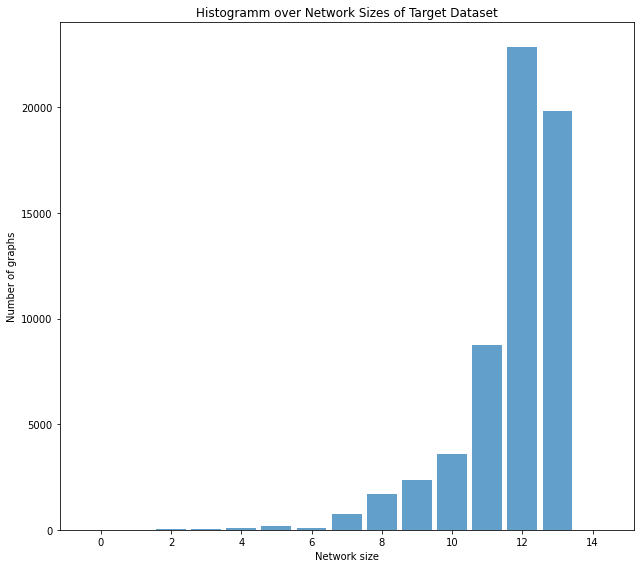

In [110]:
sizes = np.zeros((len(unique_graphs)))
for i in range(unique_graphs.shape[0]):
    sizes[i] = unique_graphs[i][:,:,15].sum()
(sizes).max()
print(len(sizes) - np.count_nonzero(sizes))
plt.figure(figsize=(9,8))
plt.hist(sizes, alpha=0.7, rwidth=0.85, bins=numpy.arange(16) - 0.5)
plt.xlabel("Network size")
plt.ylabel("Number of graphs")
plt.title("Histogramm over Network Sizes of Target Dataset")
plt.tight_layout()

In [33]:
nodes = ['carts', 'carts-db', 'catalogue', 'catalogue-db', 'front-end', 'orders', 'orders-db', 'payment', 'queue-master', 'rabbitmq', 'session-db', 'shipping', 'user', 'user-db', 'worker1', 'worker2', 'master']

In [91]:
import traceback
import overtime
from overtime.algorithms import temporal_betweenness, temporal_degree, temporal_closeness, temporal_pagerank
from tqdm.notebook import tqdm
import numpy as np
unique_graphs=np.load("/Users/max/Code/hpi/Machine-Learning-on-Spatio-Temporal-Graphs/Spatio-Temporal-Graphs/src/artificial-graph-generation/generated/100k_frontend_graphs_temporal_unique.npy")
metrics = {}
temporal_closenesses = np.zeros((unique_graphs.shape[0], len(nodes)))
temporal_betweennesses = np.zeros((unique_graphs.shape[0], len(nodes)))
temporal_degrees = np.zeros((unique_graphs.shape[0], len(nodes)))
for j in tqdm(range(unique_graphs.shape[0])):
    el = unique_graphs[j]
    tdi = overtime.TemporalDiGraph("Temporal Graph")
    this_edges = set()
    this_nodes = set()
    for t in range(el.shape[-1]):
        ones = np.transpose(np.nonzero(el[:,:,t]))
        for element in ones:
            element = tuple(element.tolist())
            if element[0] not in this_nodes:
                this_nodes.add(element[0])
                tdi.add_node(str(element[0]))
            if element[1] not in this_nodes:
                this_nodes.add(element[1])
                tdi.add_node(str(element[1]))
            if element not in this_edges:
                this_edges.add(element)
                tdi.add_edge(str(element[0]),str(element[1]), t+1, el.shape[-1]+2)
    try:
        for key, item in temporal_betweenness(tdi, optimality="foremost").items():
            temporal_betweennesses[j, int(key) - 1] = item
    except Exception as e:
        print("Betweenness failed")
    try:
        for key, item in temporal_closeness(tdi, optimality="fastest").items():
            temporal_closenesses[j, int(key) - 1] = item
    except Exception as e:
        print("Closeness failed")
    try:
        for key, item in temporal_degree(tdi, in_out="out").items():
            temporal_degrees[j, int(key) - 1] = item
    except Exception as e:
        print("Degree failed")


  0%|          | 0/60317 [00:00<?, ?it/s]

Closeness failed
Degree failed


In [95]:
np.unique(temporal_closenesses, axis=0).shape

(59959, 17)

In [96]:
temporal_degrees[6]

array([0.        , 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.41176471, 0.        , 0.        ,
       0.        , 0.        ])

In [97]:
np.unique(temporal_degrees, axis=0).shape

(55624, 17)

In [98]:
np.save("temporal_betweennesses_unique.npy", temporal_betweennesses)
np.save("temporal_closenesses_unique.npy", temporal_closenesses)
np.save("temporal_degrees_unique.npy", temporal_degrees)

In [59]:
np.save("100k_frontend_graphs_temporal_unique.npy", a.numpy())

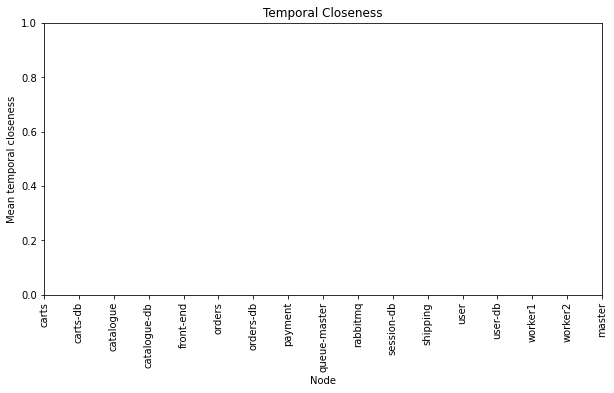

In [99]:
plt.figure(figsize=(10,5))
for key, item in sorted(metrics.items(), key=lambda x: int(x[0])):
    plt.bar(key, numpy.mean(item))
plt.title("Temporal Closeness")
plt.xlabel("Node")
plt.ylabel("Mean temporal closeness")
plt.xticks(numpy.arange(17), nodes, rotation=90)
pass

In [ ]:
import overtime
from overtime.algorithms import temporal_betweenness, temporal_degree, temporal_closeness, temporal_pagerank
from tqdm.notebook import tqdm
metrics = {}
for j in tqdm(range(b.size(0))):
    el = b[j]
    tdi = overtime.TemporalDiGraph("Temporal Graph")
    this_edges = set()
    this_nodes = set()
    for i in range(el.size(-1)):
        ones = torch.nonzero(el[:,:,i])
        for element in ones:
            element = tuple(element.numpy())
            if element[0] not in this_nodes:
                this_nodes.add(element[0])
                tdi.add_node(str(element[0]))
            if element[1] not in this_nodes:
                this_nodes.add(element[1])
                tdi.add_node(str(element[1]))
            if element not in this_edges:
                this_edges.add(element)
                tdi.add_edge(str(element[0]),str(element[1]), i+1, 16)
    for key, item in temporal_closeness(tdi).items():
        if key not in metrics:
            metrics[key] = []
        metrics[key].append(item)


  0%|          | 0/100000 [00:00<?, ?it/s]

IndexError: list index out of range

Text(0, 0.5, 'Mean temporal betweenness')

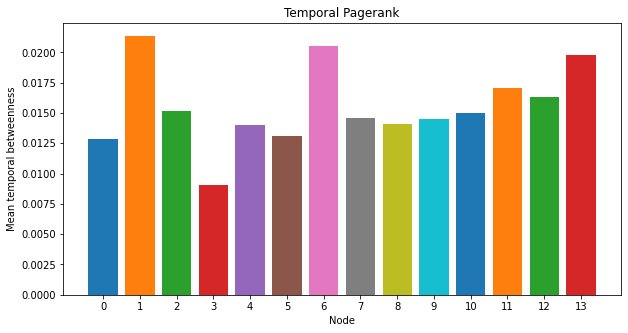

In [ ]:
plt.figure(figsize=(10,5))
for key, item in sorted(metrics.items(), key=lambda x: int(x[0])):
    plt.bar(key, numpy.mean(item))
plt.title("Temporal Pagerank")
plt.xlabel("Node")
plt.ylabel("Mean temporal betweenness")

In [50]:
randomTarget = np.random.random((100_000, 17))
randomSource = np.random.random((9000,17,))

In [40]:
from sklearn.neighbors import NearestNeighbors



In [51]:
neigh = NearestNeighbors(n_neighbors=10)

In [52]:
neigh.fit(randomTarget)

NearestNeighbors(n_neighbors=10)

In [56]:
result, dist = neigh.kneighbors(randomSource, 100_000, True)

In [ ]:
from sklearn.metrics import dcg_score

dcg_score()